In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
path = '/Volumes/secretfilesfromthepentagon/Hendel2017_revisions/revisions/ava/'
path_stats = '/Volumes/secretfilesfromthepentagon/qb3cluster/ve/revisions/ava/const/param_stats_2017_10_15/'
# path_vel = ''

In [9]:
ext_power = path+'power_2017_10_12/'
ext_const = path+'const_2017_10_12/'

In [11]:
files_power = os.listdir(ext_power)
files_const = os.listdir(ext_const)

In [12]:
[p,pow_const,L] = np.loadtxt(ext_power+files_power[0])
powers = []
pow_L = []

for i, fname in enumerate(files_power):
    [p,c,L] = np.loadtxt(ext_power+fname)
    powers.append(p)
    pow_L.append(L)

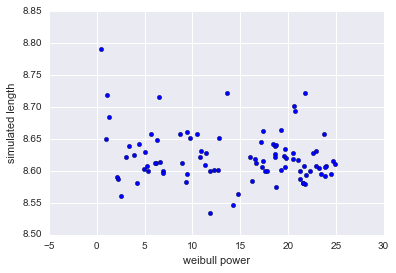

In [13]:
plt.scatter(powers,pow_L)
plt.xlabel('weibull power')
plt.ylabel('simulated length')

In [14]:
fstats = os.listdir(path_stats)

pow_s = []
con_s = []
av_s = []
base_s = []
dif_s = []
L_s = []

for i in range(len(fstats)):
    [power_s, const_s, ava_s, bas_s, diff_s, len_s] = np.loadtxt(path_stats+fstats[i])
    pow_s.append(power_s)
    con_s.append(const_s)
    av_s.append(ava_s)
    base_s.append(bas_s)
    dif_s.append(diff_s)
    L_s.append(len_s)

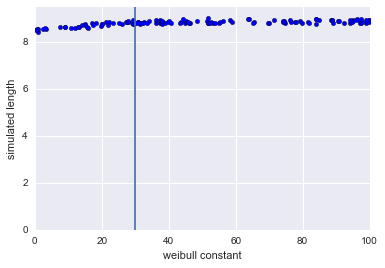

In [15]:
plt.scatter(con_s,L_s)
plt.xlim([0,100])
plt.plot([30,30.0001],[0,200], label='avalanching threshold')
plt.ylim([0,9.5])
plt.xlabel('weibull constant')
plt.ylabel('simulated length')

In [9]:
# plt.scatter(con_s,dif_s)
# plt.plot([30,30.0001],[0,200], label='avalanching threshold')
# plt.ylabel('number of motors in diffusion')
# plt.xlabel('weibull constant')
# plt.xlim([0,100])
# plt.ylim([165,190])
# plt.legend(frameon=True)

In [10]:

# plt.scatter(con_s,av_s)
# plt.xlabel('weibull constant')
# plt.ylabel('average avalanching size')

In [16]:
vel_path = '/Volumes/secretfilesfromthepentagon/qb3cluster/ve/revisions/ava/const/vel_2017_10_16/'

v_ls = os.listdir(vel_path)

v_list = []
vL_list = []

for i in range(len(v_ls)):
    [v,L] = np.loadtxt(vel_path+v_ls[i])
    v_list.append(v)
    vL_list.append(L)

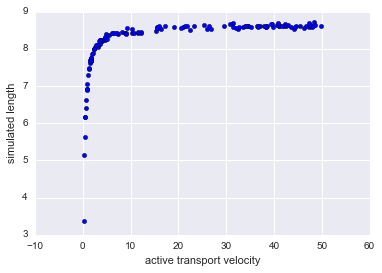

In [12]:
plt.scatter(v_list,vL_list)
plt.xlabel('active transport velocity')
plt.ylabel('simulated length')
# plt.scatter(v_list,[(2*170*1.75*.00125/.01*(1+(2*1.75)/(vL_list[i]*v_list[i]))**-1)**.5 for i in range(len(v_list))])
# plt.xlim([0,2])

In [17]:

thresh=np.zeros(100)
lensT = np.zeros(100)

for node in range(0,10):
    thr,L=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/thresh/thresh/thresh_%s.txt'%(node))
    thresh[node*10:((node+1)*10)] = thr
    lensT[node*10:((node+1)*10)] = L


In [14]:
print(pow_L[-1])
print(L_s[-1])
print(vL_list[-1])
print(lensT[15])

8.62128000028
8.81360375028
8.21610375027
8.62763625005


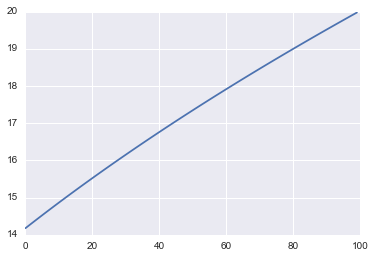

In [15]:
plt.plot(range(100),[(200+thresh[i])**.5 for i in range(100)])
# plt.plot([0,100],[0,100])

In [16]:
'''
once in revisions
rsync -r nathendel@pass1.compbio.ucsf.edu:/netapp/home/nathendel/ve/revisions/Neff_2017_10_26/Neff_2017_10_26/* ./Neff_2017_10_26/
'''

'\nonce in revisions\nrsync -r nathendel@pass1.compbio.ucsf.edu:/netapp/home/nathendel/ve/revisions/Neff_2017_10_26/Neff_2017_10_26/* ./Neff_2017_10_26/\n'

In [18]:
path_Neff = '/Users/student/Box Sync/marshall-lab/revision/Neff_2017_10_26/'
files_Neff = os.listdir(path_Neff)
num_files_Neff = len(files_Neff)

oldpred_list_Neff = np.zeros(num_files_Neff)
newpred_list_Neff = np.zeros(num_files_Neff)
L_list_Neff = np.zeros(num_files_Neff)

for i,f in enumerate(files_Neff):
    [vel, thresh_val, N_diff, Neff, oldpred, newpred, L]=np.loadtxt(path_Neff+f)
    oldpred_list_Neff[i]=oldpred
    newpred_list_Neff[i]=newpred
    L_list_Neff[i]=L

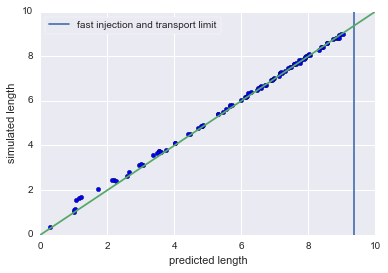

In [18]:
plt.scatter(newpred_list_Neff,L_list_Neff,c='b')

# plt.plot(oldpred_list_Neff,L_list_Neff,c='g')
plt.plot([oldpred_list_Neff[0],oldpred_list_Neff[0]],[0,10],label='fast injection and transport limit')
plt.plot([0,10],[0,10])
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('predicted length')
plt.ylabel('simulated length')
plt.legend(frameon=True,loc=2)

In [19]:
oldpred_list_Neff[0]

9.354143466934854

In [20]:
(2*170*1.75*.00125/.01)**.5

8.62409415533017

In [21]:
(2*1.75*199*.00125/.01)**.5

9.330728803260762

/Users/student/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


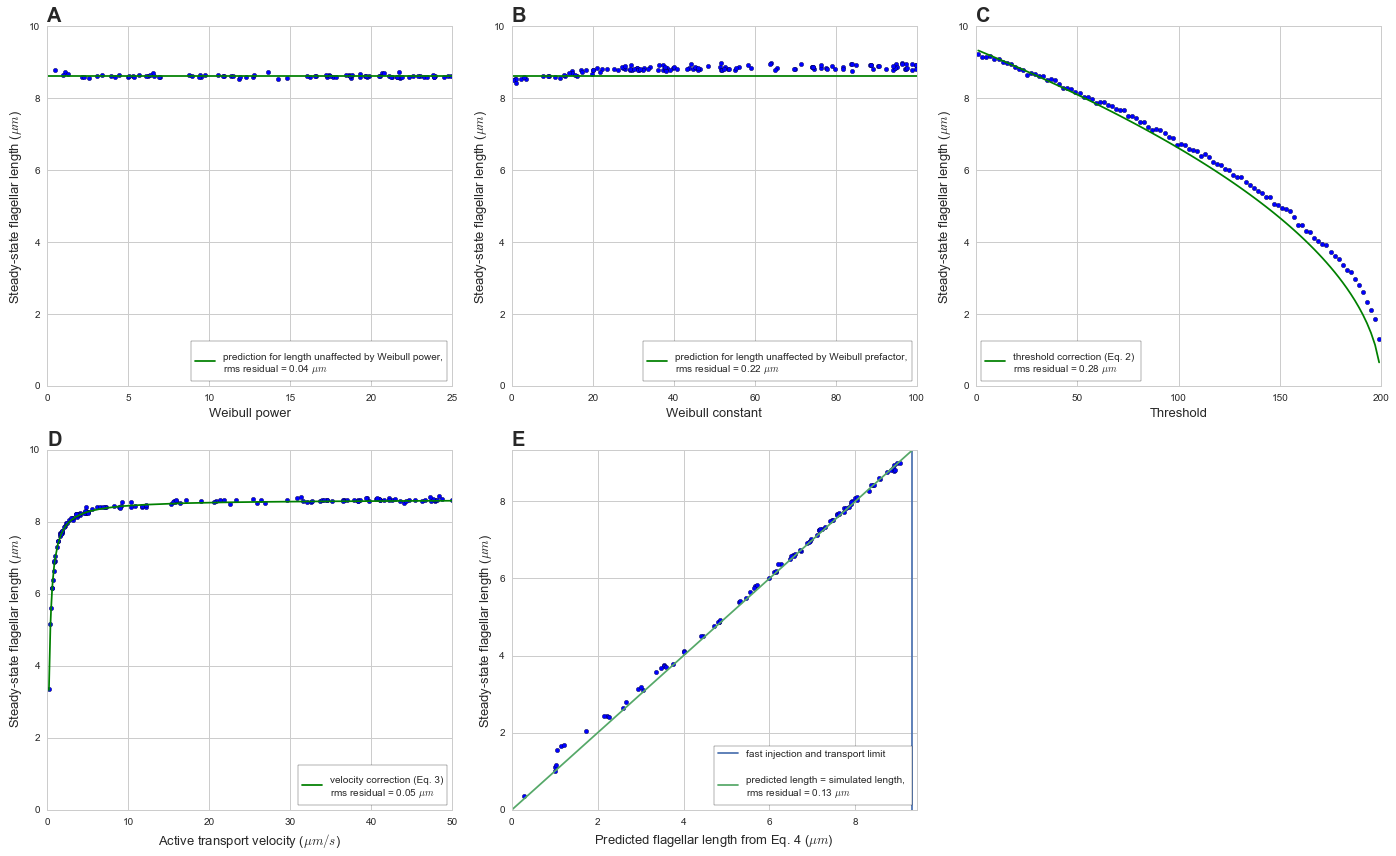

In [21]:
fig=plt.figure(1, figsize=(19.5,12),tight_layout=True);

sns.set_style("whitegrid",rc={'font.sans-serif':u'Arial'})

labelsize=20

wt_pred = (2*170*1.75*.00125/.01)**.5 #8.624


#weibull power
plt.subplot(231)
plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
plt.scatter(powers,pow_L)
plt.plot([0,25],[wt_pred,wt_pred], c='g', label='\nprediction for length unaffected by Weibull power,'+ 
         '\nrms residual = %s $\mu m$'%round(np.mean((np.array(pow_L)-wt_pred)**2)**.5,2))
plt.xlim([0,25])
plt.ylim([0,10])
plt.xlabel('Weibull power',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
legend=plt.legend(frameon=True,loc=4,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

#weibull constant
plt.subplot(232)
plt.title('B',fontsize=labelsize,loc='left',fontweight='bold')
plt.scatter(con_s,L_s)
plt.plot([0,100],[wt_pred,wt_pred], c='g', label='\nprediction for length unaffected by Weibull prefactor,'+ 
         '\nrms residual = %s $\mu m$'%round(np.mean((np.array(L_s)-wt_pred)**2)**.5,2))
plt.xlim([0,100])
# plt.plot([30,30.0001],[0,200], label='avalanching threshold')
plt.ylim([0,10])
plt.xlabel('Weibull constant',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
legend=plt.legend(frameon=True,loc=4,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

#threshold
plt.subplot(233)
plt.title('C',fontsize=labelsize,loc='left',fontweight='bold')
plt.scatter(thresh,lensT)
thresh_corr = [(2*(200-i)*1.75*.00125/.01)**.5 for i in thresh]
plt.plot(thresh,thresh_corr, c='g',label='\nthreshold correction (Eq. 2) \nrms residual = %s $\mu m$'%round(np.mean((lensT-thresh_corr)**2)**.5,2))
plt.xlim([0,200])
plt.ylim([0,10])
plt.xlabel('Threshold',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
legend=plt.legend(frameon=True,loc=3,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

#velocity
v_array=np.array(v_list)
vL_array = np.array(vL_list)
v_sort = np.sort(v_list)
argso=v_array.argsort()
L_sort = vL_array[argso]
plt.subplot(234)
plt.title('D',fontsize=labelsize,loc='left',fontweight='bold')
plt.scatter(v_list,vL_list)
vL_pred = [(2*170*1.75*.00125/.01*(1+2*1.75/(L_sort[i]*v_sort[i]))**-1)**.5 for i in range(len(v_list))]
plt.plot(v_sort,vL_pred,c='g',
         label='\nvelocity correction (Eq. 3)\nrms residual = %s $\mu m$'%round(np.mean((L_sort-vL_pred)**2)**.5,2))
plt.xlim([0,50])
plt.ylim([0,10])
plt.xlabel(r'Active transport velocity ($\mu m/s$)',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
legend=plt.legend(frameon=True,loc=4,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')


#N_eff
plt.subplot(235)
plt.title('E',fontsize=labelsize,loc='left',fontweight='bold')
plt.scatter(newpred_list_Neff,L_list_Neff,c='b')

lim=9.330728803260762 #predicted length from simulation with normal parameters with infinite transport speed and thresh=1

plt.plot([lim,lim],[0,10],label='fast injection and transport limit')
plt.plot([0,10],[0,10],label='\npredicted length = simulated length, \nrms residual = %s $\mu m$'%round(np.mean((L_list_Neff-newpred_list_Neff)**2)**.5,2))
plt.xlim([0,lim+.1])
plt.ylim([0,lim])
plt.xlabel('Predicted flagellar length from Eq. 4 ($\mu m$)',fontsize=13)
plt.ylabel('Steady-state flagellar length ($\mu m$)',fontsize=13)
legend=plt.legend(frameon=True,loc=4,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig04_sideparams.png')
# plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig04_otherparams.eps', format='png', dpi=1200,bbox_inches='tight')

plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/final_version/Figure 4.png', format='png', dpi=1200)